[Moscow](https://coronavirus-monitor.ru/coronavirus-v-moskve/)<br>
[Saint Petersburg](https://coronavirus-monitor.ru/coronavirus-v-sankt-peterburge/)<br>
[Komi](https://coronavirus-monitor.ru/coronavirus-v-respublike-komi/)<br>
[2020 coronavirus pandemic in Russia](https://en.wikipedia.org/wiki/2020_coronavirus_pandemic_in_Russia)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import math

PATH_DB = '/media/l3m/LinuxFilesBig/1-datasets/COVID-19/'

<br>

### Load and prepare data

In [2]:
# Load data from disk in Notebook
data_ac = pd.read_csv(PATH_DB+'COVID-19-cities.csv')

# check result
print(data_ac.shape)
data_ac.head(3)

(102, 5)


,City,Date,Confirmed,Deaths,Recovered
0,Moscow,02/29/20,0,0,0
1,Moscow,03/01/20,1,0,0
2,Moscow,03/02/20,1,0,0


In [3]:
# Convirt content of 'Date'-column to date format
data_ac['Date'] = pd.to_datetime(data_ac['Date'])

# check result
print(data_ac.shape)
data_ac.head(3)

(102, 5)


,City,Date,Confirmed,Deaths,Recovered
0,Moscow,2020-02-29,0,0,0
1,Moscow,2020-03-01,1,0,0
2,Moscow,2020-03-02,1,0,0


<br>

### Create a table revealing of new cases

In [4]:
# Till now DataFrame contains total number of cases.
# Change it to the number of new cases per day (calculate it as difference b/w neighbouring rows)

data_dynamics = pd.concat([data_ac[['City', 'Date']],
                           data_ac[['Confirmed', 'Deaths', 'Recovered']].diff()
                          ], axis='columns') \
                  .reset_index(drop=True)

print(data_dynamics.shape)
data_dynamics.head(3)

(102, 5)


,City,Date,Confirmed,Deaths,Recovered
0,Moscow,2020-02-29,NaN,NaN,NaN
1,Moscow,2020-03-01,1.0,0.0,0.0
2,Moscow,2020-03-02,0.0,0.0,0.0


In [5]:
# Now the first row (earliest day of observatopm) for each country contains garbage.
# So, delete the earliest data for each country

def delete_earliest_data(gr):
    gr.drop(gr.index[0], inplace=True)
    return gr
    
data_dynamics = data_dynamics.groupby(['City']) \
                             .apply(delete_earliest_data) \
                             .reset_index(drop=True)

# Correct type of some columns back to int
data_dynamics[['Confirmed', 'Deaths', 'Recovered']] = \
    data_dynamics[['Confirmed', 'Deaths', 'Recovered']].astype('int')

print(data_dynamics.shape)
data_dynamics.head(3)

(99, 5)


,City,Date,Confirmed,Deaths,Recovered
0,Komi,2020-03-01,0,0,0
1,Komi,2020-03-02,0,0,0
2,Komi,2020-03-03,0,0,0


In [6]:
data_dynamics.head(60)

,City,Date,Confirmed,Deaths,Recovered
0,Komi,2020-03-01,0,0,0
1,Komi,2020-03-02,0,0,0
2,Komi,2020-03-03,0,0,0
3,Komi,2020-03-04,0,0,0
4,Komi,2020-03-05,0,0,0
5,Komi,2020-03-06,0,0,0
6,Komi,2020-03-07,0,0,0
7,Komi,2020-03-08,0,0,0
8,Komi,2020-03-09,0,0,0
9,Komi,2020-03-10,0,0,0


<br>

### Create graphs with raw and smooth data

In [20]:
def extract_df(df_overall, city_name=None, last_date=datetime.datetime.now(), number_of_days=90):
    """Extract from overall DataFrame sub-DataFrame according given limitations.
    
    :df_overall:     overall (big) DataFrame
    :city_name:      name of city
    :last_date:      last date till that the graph will be shown
    :number_of_days: number of days in the graph
    :return:         sub-DateFrame
    """
    first_date = last_date + datetime.timedelta(days=-number_of_days+1)

    if city_name:
        sub_df = df_overall[(df_overall['City'] == city_name) &
                            (df_overall['Date'] >= first_date) &
                            (df_overall['Date'] <= last_date)]
    else:
        sub_df = df_overall[(df_overall['Date'] >= first_date) &
                            (df_overall['Date'] <= last_date)]

    return sub_df    

In [21]:
def build_graph(df, *, title_text=None):
    # create index to set proper appearance of x-axis
    df.index = df['Date'].dt.strftime('%b-%d')
    
    # remove label 'Date' from the x-axis
    df.rename_axis(None, axis='rows', inplace=True)
    
    df['Confirmed'].plot(kind='bar', width=1, title=title_text,
                         color=['#1F77B4', '#5398C6'], figsize=(20,6), fontsize=14)
    
    return None

We can see in the graphs that occasionally a day of high revealing of infection adjoins with a day of low revealing. I suggest to smooth the data, taking for each day an average value between three adjacent days.

In [22]:
def smooth_df(df):
    
    def smooth_column_values(column):
        ls = list(column)
        lng = len(ls)

        smoothed_values = [] 
        
        smoothed_values.append(round((ls[0]*2 + ls[1]) / 3, 2))
        smoothed_values.extend([round((ls[i-1] + ls[i] + ls[i+1]) / 3, 2) for i in range(1, lng-1)])
        smoothed_values.append(round((ls[lng-2] + ls[lng-1]*2) / 3, 2))
    
        return smoothed_values

    df_smoothed = df.copy()
    for col_name in ['Confirmed', 'Deaths', 'Recovered']:
        df_smoothed[col_name] = smooth_column_values(df_smoothed[col_name])
        
    return df_smoothed

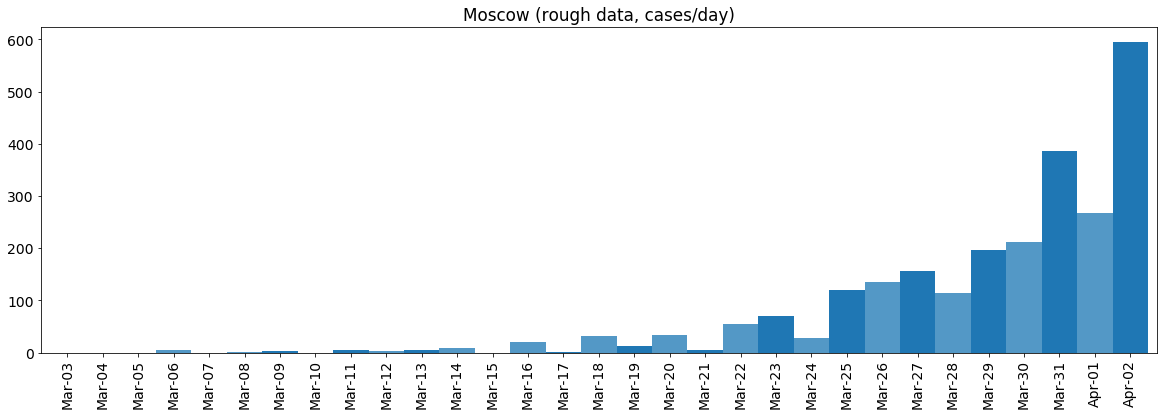

In [23]:
# with raw data
CITY_NAME_GLOBAL = 'Moscow'
LAST_DATE_GLOBAL = data_ac['Date'].max()  # LAST_DATE_GLOBAL = datetime.datetime(2020, 3, 31)
NUMBER_OF_DAYS_GLOBAL = 31

city_name = CITY_NAME_GLOBAL
last_date = LAST_DATE_GLOBAL
number_of_days = NUMBER_OF_DAYS_GLOBAL

city_graph = extract_df(data_dynamics, city_name, last_date, number_of_days)

build_graph(city_graph, title_text=city_name+' (rough data, cases/day)')

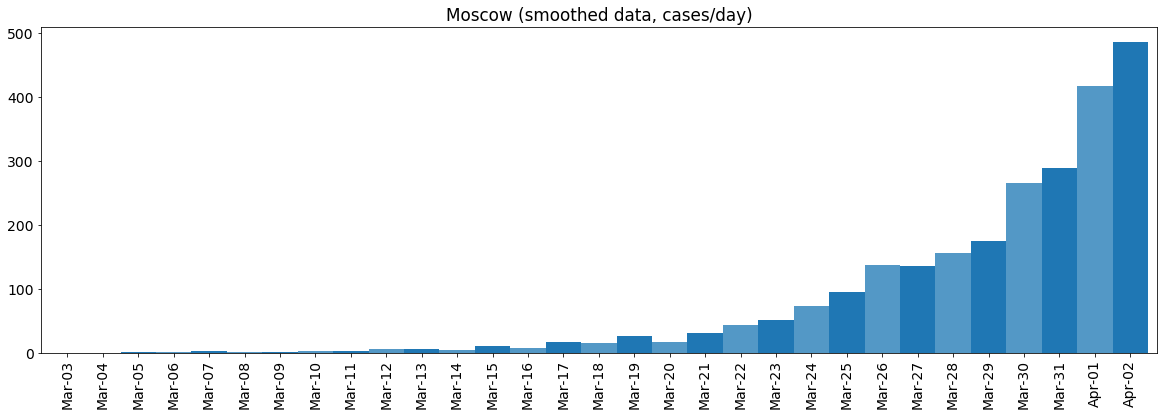

In [24]:
# with smooth data
city_name = CITY_NAME_GLOBAL
last_date = LAST_DATE_GLOBAL
number_of_days = NUMBER_OF_DAYS_GLOBAL

city_smoothed = smooth_df(extract_df(data_dynamics, city_name, last_date, number_of_days))

build_graph(city_smoothed, title_text=city_name+' (smoothed data, cases/day)')

<br>

### Comparison of several countries

In [25]:
plt.rcParams['figure.figsize'] = (20, 8)  # plt.rc('figure', figsize=(20, 8))
plt.rcParams['font.size'] = 14             # plt.rc('font', size=14)

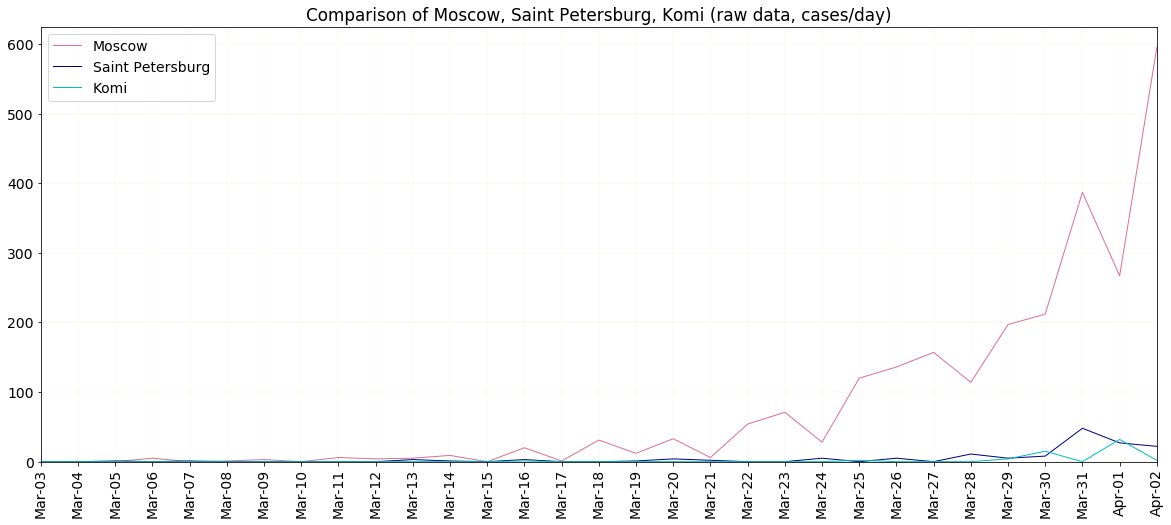

In [26]:
# for raw data, linear scale

cities = ['Moscow', 'Saint Petersburg', 'Komi']
colors = ['palevioletred', 'navy', 'c']
styles = ['-', '-', '-']

last_date = LAST_DATE_GLOBAL
number_of_days = NUMBER_OF_DAYS_GLOBAL

for i, city_name in enumerate(cities):
    city_graph = extract_df(data_dynamics, city_name, last_date, number_of_days)
    plt.plot(city_graph['Date'].dt.strftime('%b-%d'), city_graph['Confirmed'],
             color=colors[i], linestyle=styles[i], linewidth=1, label=city_name)

plt.xticks(rotation='vertical')
plt.grid(color='wheat', linewidth=0.2)
plt.legend(loc='upper left')
    
plt.title(f"Comparison of {', '.join(cities)} (raw data, cases/day)")
plt.margins(x=0)
plt.ylim(0)

plt.show()

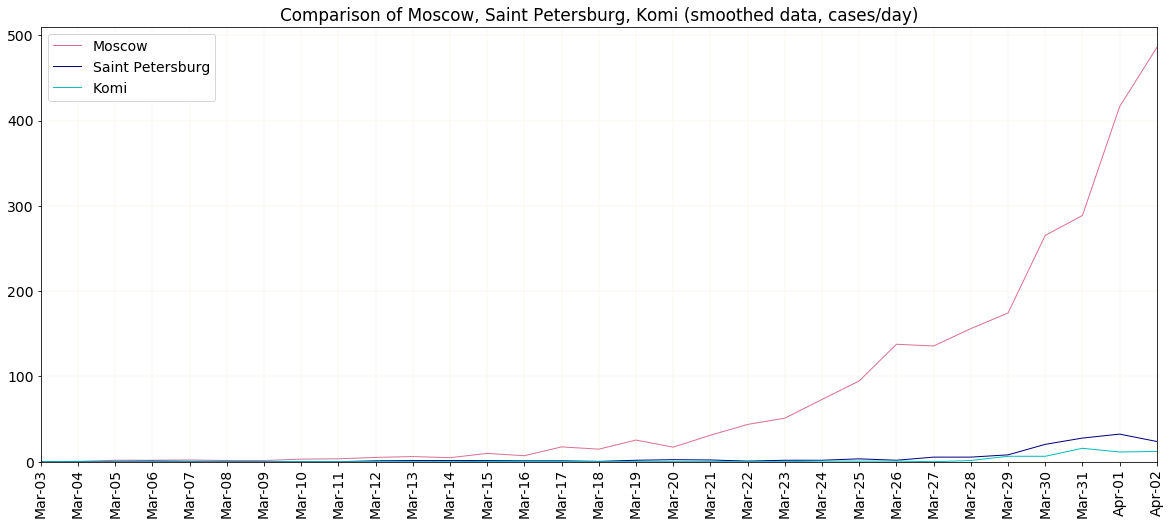

In [27]:
# for smoothed data, linear scale

cities = ['Moscow', 'Saint Petersburg', 'Komi']
colors = ['palevioletred', 'navy', 'c']
styles = ['-', '-', '-']

last_date = LAST_DATE_GLOBAL
number_of_days = NUMBER_OF_DAYS_GLOBAL

for i, city_name in enumerate(cities):
    city_graph = extract_df(data_dynamics, city_name, last_date, number_of_days)
    southed_graph = smooth_df(city_graph)
    plt.plot(southed_graph['Date'].dt.strftime('%b-%d'), southed_graph['Confirmed'],
             color=colors[i], linestyle=styles[i], linewidth=1, label=city_name)

plt.xticks(rotation='vertical')
plt.grid(color='wheat', linewidth=0.2)
plt.legend(loc='upper left')

plt.title(f"Comparison of {', '.join(cities)} (smoothed data, cases/day)")
plt.margins(x=0)
plt.ylim(0)

plt.show()

<br>

---

<br>
temp:

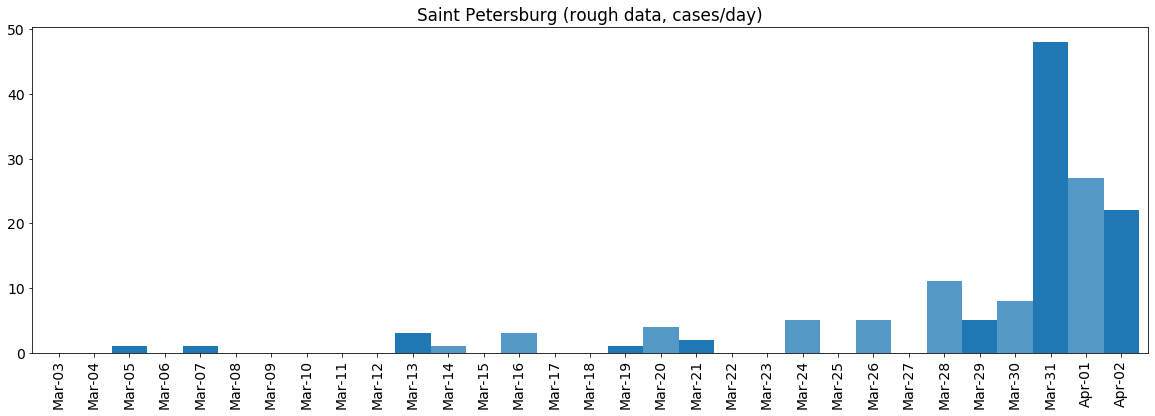

In [28]:
# with raw data
city_name = 'Saint Petersburg'
last_date = LAST_DATE_GLOBAL
number_of_days = NUMBER_OF_DAYS_GLOBAL

city_graph = extract_df(data_dynamics, city_name, last_date, number_of_days)

build_graph(city_graph, title_text=city_name+' (rough data, cases/day)')

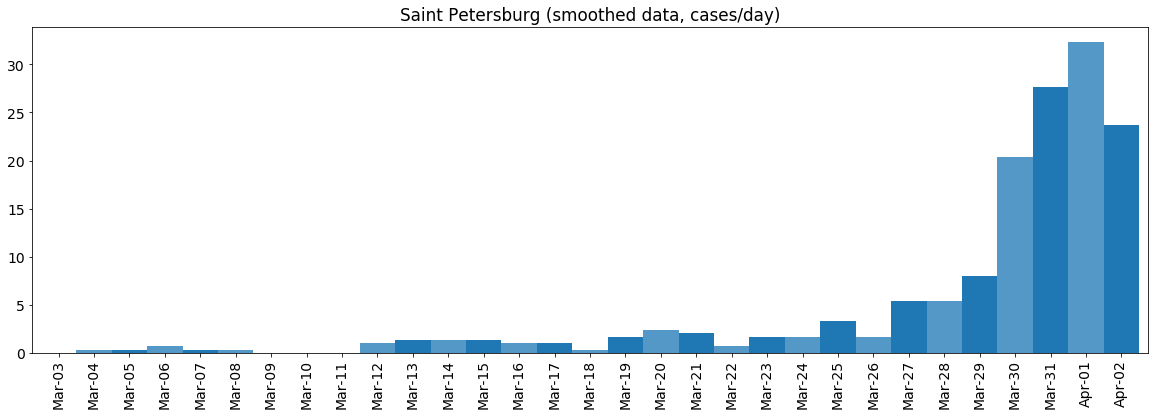

In [29]:
# with smooth data
city_name = 'Saint Petersburg'
last_date = LAST_DATE_GLOBAL
number_of_days = NUMBER_OF_DAYS_GLOBAL

city_smoothed = smooth_df(extract_df(data_dynamics, city_name, last_date, number_of_days))

build_graph(city_smoothed, title_text=city_name+' (smoothed data, cases/day)')

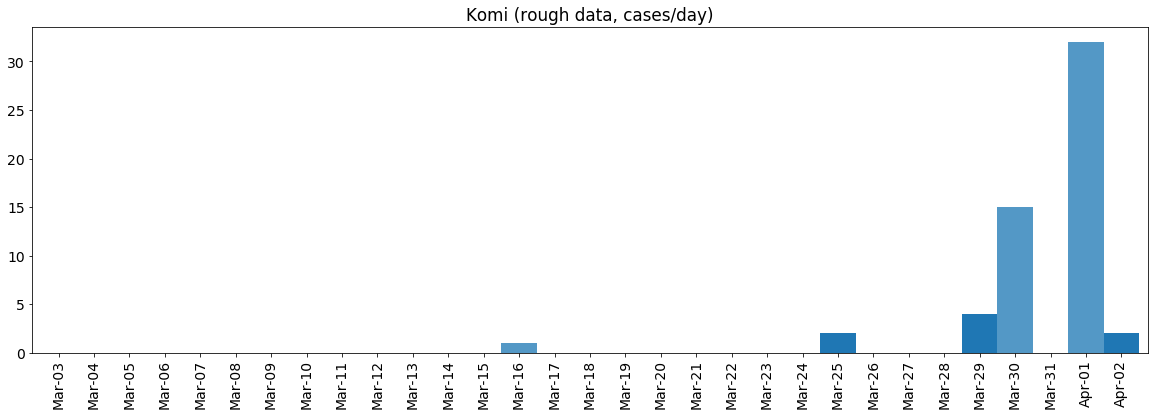

In [30]:
# with raw data
city_name = 'Komi'
last_date = LAST_DATE_GLOBAL
number_of_days = NUMBER_OF_DAYS_GLOBAL

city_graph = extract_df(data_dynamics, city_name, last_date, number_of_days)

build_graph(city_graph, title_text=city_name+' (rough data, cases/day)')

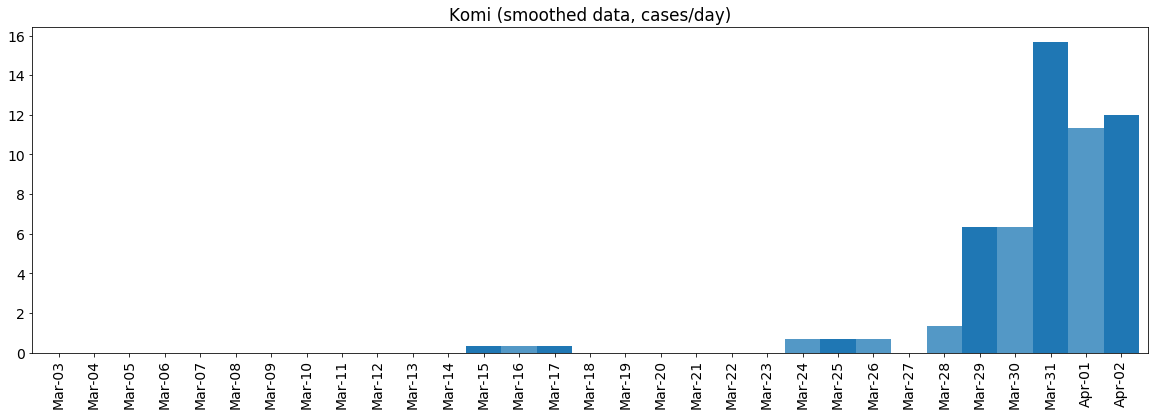

In [31]:
# with smooth data
city_name = 'Komi'
last_date = LAST_DATE_GLOBAL
number_of_days = NUMBER_OF_DAYS_GLOBAL

city_smoothed = smooth_df(extract_df(data_dynamics, city_name, last_date, number_of_days))

build_graph(city_smoothed, title_text=city_name+' (smoothed data, cases/day)')